# Logistic Regression

### data: 성별 소득 data 에 따라 특정 구매자의 구매할지 여부를 예측

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score # 두 줄 이어서 쓰고 싶으면 
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score
import seaborn as sns

In [6]:
df = pd.read_csv("datasets/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df.tail(20) # 뒤쪽에서 20개를 볼 수 있음.

,User ID,Gender,Age,EstimatedSalary,Purchased
380,15683758,Male,42,64000,0
381,15670615,Male,48,33000,1
382,15715622,Female,44,139000,1
383,15707634,Male,49,28000,1
384,15806901,Female,57,33000,1
385,15775335,Male,56,60000,1
386,15724150,Female,49,39000,1
387,15627220,Male,39,71000,0
388,15672330,Male,47,34000,1
389,15668521,Female,48,35000,1


In [11]:
df["Purchased"].value_counts() 
# 머신러닝을 훈련시킬 떄 가장 좋은 조건은 두 개의 케이스가 0하고 1이 균형 이룰때 가장 이상적임
# 일반적으로 데이터가 그렇게 확보가 안됨. 2:1정도면 노멀한 상태
# 극도로 편향 시킨 경우는 막 99:1

Purchased
0    257
1    143
Name: count, dtype: int64

### Age, EstimatedSalary 를 변수로 선택 (필요한 데이터만 뽑아내는 과정)
두 개의 숫자 컬럼만 선택해서 지도학습을 시켜보겠다.

In [17]:
# 두 개의 변수만 인덱싱 (데이터프레임에 인덱스를 가지고 슬라이싱을 해야함)
# iloc 인덱스로 로케이션 하겠다고 해서 iloc
# row 전부다, 그리고 인덱스 2,3번만 추출하겠다, 슬라이싱 하겠다.
X = df.iloc[:,[2,3]].values.astype("float32") # 머신러닝의 입력으로 줄 떄 일반적으로 float 타입으로 주는게 좋음 
y = df.iloc[:,4].values.astype("float32")
X.shape, y.shape

((400, 2), (400,))

## dataset 을 Training 과 Test set 으로 분리

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# 4:1 비율로 나누기!!
X_train.shape, X_test.shape, y_train.shape, y_test.shape # 400개의 데이터가 320,80개로 잘 나눠졌

((320, 2), (80, 2), (320,), (80,))

## Feature Scaling

### train data 로 fit 하고, test data 는 train data 의 분포에 맞추어 transform

In [ ]:
# Standard Scaling 공식 = (X - mu) / Sigma
# fit 함수는 mu,Sigma를 구하는 단계
# transform 단계는 실제로 공식에 적용해서 작은 숫자로 바꿔주는 역할

In [20]:
# 같은 크기로 정규화 되도록 스케일링 해준다
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # fit,transform 두 단계를 한번에 합친거임. 
X_test = sc.transform(X_test) # X_test는 transform만 해야함. 
# 만약에 테스트 데이터셋에 대해서도 여기서도 fit, transform을 해주면 
# 얘는 별도로 테스트 데이터셋에 평균과 표준 편차를 다시 계산해줌
# train,test셋은 우리가 처음에 애초에 이렇게 셔플을 해서 섞어서 나눴다는 얘기는 데이터의 분포가 동일하다고
# 우리가 전제를 하고 그렇게 만들려는 거였고 만약에 데이터의 분포가 동일하다면, 이 데이터들의 평균과 표준편차도 동일해야함
# X_test라는 것은 미래에 발생한, 아직 발생하지 않은 데이터를 미리 가정을 해서 우리가 갖고 있는 데이터를 쓰는 것이기 때문에
# 미래에 발생할 데이터의 평균과 표준편차를 미리 계산할 순 없음. 
# 훈련에 대해서만 평균과 표준편차를 계산하고, test 데이터는 미래에 발생할 데이터이기 때문에
# 후련 데이터에서 계산한 평균과 표준편차로 tranform만 해야하는 것을 반드시 기억해야함!!! 실수하면 안됨!!!

In [22]:
X_train.shape, X_test.shape # 크기만 바뀐 상태, shape은 그대로 유지

((320, 2), (80, 2))

## Training set 에 대해 Logistic Regression model 을 fitting

In [32]:
# 파라미터 확인 가능
# LogisticRegression?
# max_iter = 데이터가 얼마 없으니깐 100이면 충분, 데이터가 더 많으면 키워줄 수도 있음.
# 아직 최적화 안됐는데 일찍 끝나버렸다 --> max_iter를 늘려라 

In [34]:
lr_clf = LogisticRegression() # 그냥 디폴트 값 사용
lr_clf.fit(X_train,y_train)

LogisticRegression()

## predict

- predict() - 예측된 class 반환 using X_test
- predict_proba() - class 당 probability 반환 using X_test

In [36]:
y_pred = lr_clf.predict(X_test)
y_pred # 50%보다 큰 것은 무조건 1이라고 예측하고, 50%보다 작은 것은 0이라고 예측함.

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.], dtype=float32)

In [40]:
accuracy_score(y_test,y_pred) # 일단 맞춘거는 92.5% 맞춤

0.925

In [41]:
precision_score(y_test,y_pred) # 우리가 맞췄다고 한 것 중에서 우리가 이제 true를 true로 잘 맞추느냐
# 물건을 살 사람을 살 사람으로 잘 맞추느냐 --> 94%

0.9444444444444444

In [39]:
recall_score(y_test,y_pred) # 전체 true 중에서 우리가 얼마를 놓치지 않고 다 포함했느냐
# precision score가 94인데 recall은 72임 --> 우리가 놓친 케이스가 많다는 것.

0.7727272727272727

In [70]:
# threshold가 처음에 0.5이었지만 기준을 높였을 경우
threshold = 0.8

In [71]:
# 확률값을 반환해줌. 0일 확률, 1일 확률.
y_pred_proba = lr_clf.predict_proba(X_test) # 시그모이드 함수이기에 0~1 사이에 확률 값을 반환함
# 그게 정확한 값이 y_pred_proba임. 
y_pred_proba1 = y_pred_proba[:,1] > threshold # 전체 레코드에 대해서 두번째 column [:,1]을 하면 두 번째를 표시
y_pred_proba1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True])

In [81]:
sum(y_pred_proba[:,1] > 0.5) # 이건 threshold = 0.5인 경우

18

In [84]:
sum((y_pred_proba1) == y_test) # threshold = 0.8인 경
# true, false로 되어 있는 거를 y 테스트 값하고 실제로 예측한거랑 비교를 함
# 맞춘거는 True 틀린거랑은 False.

70

In [85]:
sum((y_pred_proba1 == y_test) / len(y_test)) # accuracy를 손으로 계산한
# 전체 개수 중에 몇 개를 맞췄느냐 하니깐 92.5%를 맞췄다. 18개를 맞췄다

0.8749999999999989

In [87]:
precision_score(y_test,y_pred_proba1) # 우리가 true라고 맞춘 것들, 우리가 맞춘것들 중에서 진짜 정답이었던 거, 
# 그게 100%로 올라갔음

1.0

In [89]:
recall_score(y_test, y_pred_proba1)
#precision이 올라가면 recall은 떨어진다. 
# threshold = 0.3, 기준을 완만하게 주면 precision은 내려가고, recall은 올라간다
# precision이 떨어졌다 --> 우리가 이 사람이 살거다, 이 고객이 살거다 안 살거다 라고 맞춘 것들 중에 상당 부분이 틀림
# recall이 올랐다 --> 우리가 살거다 안살거다라고 예측한 그 값들 중에서 true인 값들(=1인 값들) 그것들을 덜 놓침!!
# 원래는 0이지만, 1로 잘못 맞춘것은 많아졌지만, 쨋든 true,1인 것들 다 많이 잡아냈다. (높음 recall)

0.5454545454545454

### precision & recall 예시, threshold을 정할 때 목적에 따라 정해야함!!
- precision이 높아야하는 경우 : 사람을 죽이는, 우리가 회복 불가능한 그런 결정을 해야하는 인공지능 전투로봇을 만든다고 할때, 적군 몇 명을 아군으로 생각해서 잘못 살려주더라도, 적군이라고 확신한 것은 100% 맞아야함 --> precision이 굉장히 높은 인공지능을 만들어야함.
- recall이 높아야하는 경우 : 암인 경우를 판정하는 그런 경우에는 설사 암이라고 내가 판정을 해도 그 사람이 암이 아니면 죽을 일은 없지만, 만약 내가 암인 환자를 놓친 경우에는 그 사람이 진료도 못 받고 죽을 테니까 그럴 경우에는 당연히 true인 케이스 1인걸 놓치지 않기 위해 recall을 높여야함. (설마 암이 아닌 사람도 암이라고 잘못 판정해도 크게 지장X)

## confusion matrix 를 이용한 model 평가

In [90]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[57,  1],
       [ 5, 17]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

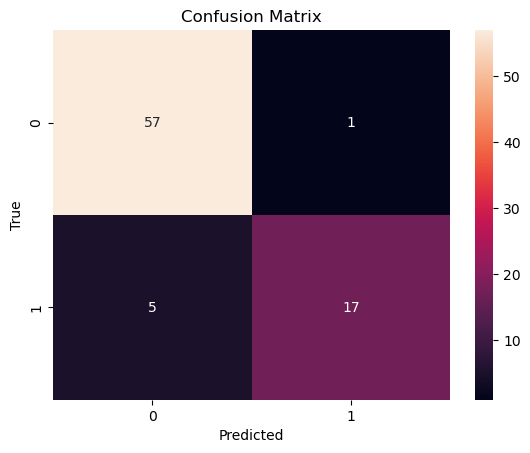

In [94]:
ax = sns.heatmap(cm,annot=True, fmt='d') # annot=True 설정 안해주면 안에 숫자가 안타나남.
ax.set_title('Confusion Matrix')
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
# 고객이 살 건데(1) 안 산다고 잘못 맞춘게(0) 5개
# 고객이 안 살건데 산다고 잘못 맞춘게 1개
# 원리를 이해하는게 좋음, 혼동행렬 순서를 외우는건 X 
# 사이킷런 디폴트는 왼쪽이 True, 위쪽이 prediction
# 0,0 --> true negative 1,1 --> true positive ppt (슬라이드랑 위치가 다름)

## Visualization

roc_curve(y_true, y_score)  

fpr - false positive rates,  tpr - true positive rates

In [99]:
y_proba = lr_clf.predict_proba(X_test)
y_scores = y_proba[:,1]
y_scores
# 1일 확률이 몇 %인지 그 값을 알려줌 

fpr,tpr,_ = roc_curve(y_test,y_scores) # 실제로 변수를 3개 반환하는데, 우리는 2개만 쓰니깐 (_) 언더바 써준다.
auc = roc_auc_score(y_test,y_scores)

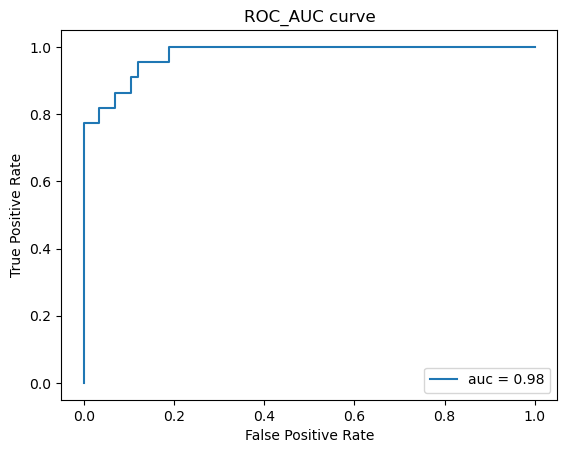

In [103]:
plt.plot(fpr,tpr,label="auc = {:.2f}".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC_AUC curve")
plt.legend() # 딥러닝도 똑같은, 여러개의 모델을 이후에 만들때 뭐가 최적인지 모름.
# 다양한 모델들을 같은 데이터에 대해서 우리가 만들어놓고 성능을 비교해야함. 
# 직접 여러개의 모델을 써봐야함. --> 커브 곡선을 그리고 가장 면적이 넓은 모델을 선택한다!!

# 실습 

### 통신회사의 고객 이탈 여부를 logistic regression 으로 예측

## Data pre-processing and feature selection

개별 feature 에 대한 분석 후(본 과정에서는 생략)에 Logistic Regression 에 사용할 feature 선정

tenure(가입기간), age (연령), income(수입) 으로 예측하고 churn (이탈여부) 은 integer 로 type 변경

### data scaling

### Train/Test dataset 분리